# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [178]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [179]:
batch_size = 70

### Carregamento, criação dataset e do dataloader

In [180]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

print('Tamanho do dataset:', len(dataset_train))

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('\nNúmero de minibatches de treinamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))

print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Tamanho do dataset: 60000

Número de minibatches de treinamento: 858

Dimensões dos dados de um minibatch: torch.Size([70, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [181]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 858


## Modelo

In [182]:
model = torch.nn.Linear(28*28, 10)

In [183]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[ 1.0979, -0.4151,  0.2466,  0.2597, -0.7376, -0.6877,  0.6465, -0.0598,
          0.1304,  0.9490]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [184]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [185]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k, (x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = x_train.view(-1, 28 * 28)
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

        print(f'Época: {i + 1}/{n_epochs}, batch: {k + 1}')

Época: 1/5, batch: 1
Época: 1/5, batch: 2
Época: 1/5, batch: 3
Época: 1/5, batch: 4
Época: 1/5, batch: 5
Época: 1/5, batch: 6
Época: 1/5, batch: 7
Época: 1/5, batch: 8
Época: 1/5, batch: 9
Época: 1/5, batch: 10
Época: 1/5, batch: 11
Época: 1/5, batch: 12
Época: 1/5, batch: 13
Época: 1/5, batch: 14
Época: 1/5, batch: 15
Época: 1/5, batch: 16
Época: 1/5, batch: 17
Época: 1/5, batch: 18
Época: 1/5, batch: 19
Época: 1/5, batch: 20
Época: 1/5, batch: 21
Época: 1/5, batch: 22
Época: 1/5, batch: 23
Época: 1/5, batch: 24
Época: 1/5, batch: 25
Época: 1/5, batch: 26
Época: 1/5, batch: 27
Época: 1/5, batch: 28
Época: 1/5, batch: 29
Época: 1/5, batch: 30
Época: 1/5, batch: 31
Época: 1/5, batch: 32
Época: 1/5, batch: 33
Época: 1/5, batch: 34
Época: 1/5, batch: 35
Época: 1/5, batch: 36
Época: 1/5, batch: 37
Época: 1/5, batch: 38
Época: 1/5, batch: 39
Época: 1/5, batch: 40
Época: 1/5, batch: 41
Época: 1/5, batch: 42
Época: 1/5, batch: 43
Época: 1/5, batch: 44
Época: 1/5, batch: 45
Época: 1/5, batch: 

In [186]:
print('Final loss:', loss.data)

Final loss: tensor(0.0659)


### Visualizando gráfico de perda durante o treinamento

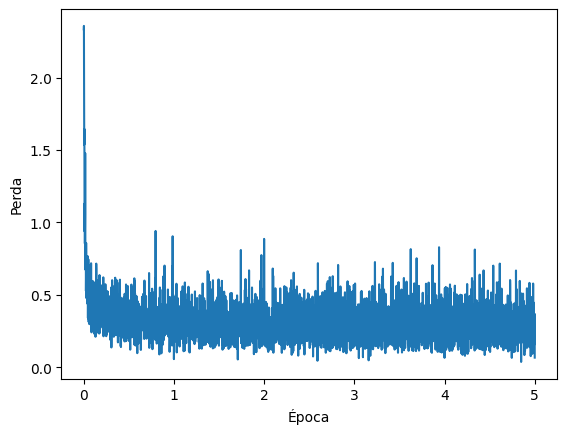

In [187]:
plt.plot(epochs, losses)
plt.xlabel('Época')
plt.ylabel('Perda')
plt.show()

### Visualização usual da perda, somente no final de cada minibatch

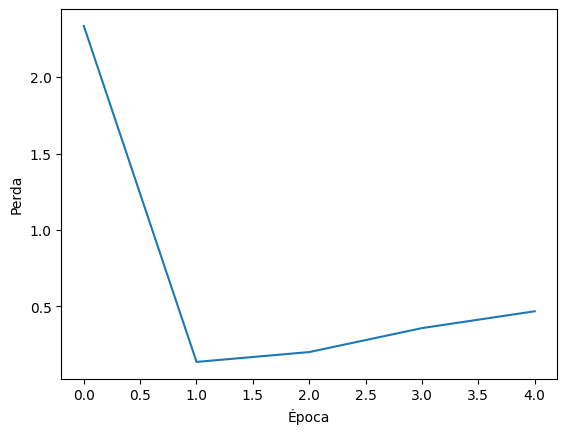

In [188]:
plt.plot(epochs[:5 * n_batches_train + 1:n_batches_train], losses[:5 * n_batches_train + 1:n_batches_train])
plt.xlabel('Época')
plt.ylabel('Perda')
plt.show()

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?
  - 100 itens para cada mini-batch.
2. Em uma época, quantos mini-batches existem?
  - Como são 60.000 itens no dataset e 100 itens para cada mini-batch, uma época tem 60.000 / 100 = 600 mini-batches.
3. Qual é a definição de época?
  - Cálculo da predição, perda, gradientes, gradiente descendente e atualização dos pesos. Nesse caso, esses cálculos precisam ser realizados em todos os mini-batches para uma época ser considerada completa.

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600
2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

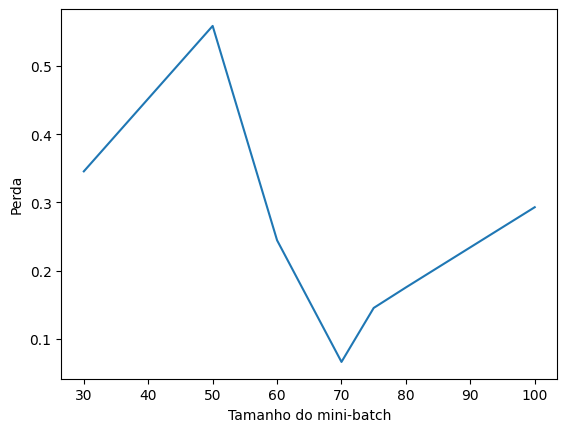

In [190]:
map_mini_batch_and_loss = {
    100: 0.2929,
    80: 0.1752,
    75: 0.1451,
    70: 0.0659,
    60: 0.2444,
    50: 0.5589,
    30: 0.3455
}

plt.plot(map_mini_batch_and_loss.keys(), map_mini_batch_and_loss.values())
plt.xlabel('Tamanho do mini-batch')
plt.ylabel('Perda')
plt.show()

## Conclusões sobre os experimentos deste notebook
- Não existe um valor ideal pré-definido de mini-batches ou da quantidade de itens em um mini-batch, e nem mesmo a relação de "quanto mais mini-batches, melhor". Com base no experimento feito, o tamanho do mini-batch igual a **70** que teve melhor (menor) valor de perda (**0.0659**), que foi o equilíbrio entre um gradiente "estável o suficiente" e um "número de atualizações" alto o suficiente para aprender rápido.